# Scikit MultiLearn

## Part 1: Introduction and test

In [1]:
from skmultilearn.dataset import load_dataset
import pandas as pd
import numpy as np

In [2]:
X_train, y_train, feature_names, label_names = load_dataset('emotions', 'train')
X_test, y_test, _, _ = load_dataset('emotions', 'test')

emotions:train - exists, not redownloading
emotions:test - exists, not redownloading


**数据集**

In [3]:
train_X_df = pd.DataFrame(X_train.toarray(),columns = [n for n,d in feature_names])
train_X_df.head()

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,Std_Acc1298_Std_Mem40_MFCC_11,Std_Acc1298_Std_Mem40_MFCC_12,BH_LowPeakAmp,BH_LowPeakBPM,BH_HighPeakAmp,BH_HighPeakBPM,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,0.118630,0.094923,0.051035,68.0,0.014937,136.0,2.0,0.245457,0.105065,0.405399
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,0.070075,0.041565,0.295031,70.0,0.276366,140.0,2.0,0.343547,0.276366,0.710924
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,0.079917,0.085821,0.161574,61.0,0.000000,183.0,3.0,0.188693,0.045941,0.457372
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,0.129145,0.122330,0.043012,66.0,0.206562,132.0,2.0,0.102839,0.241934,0.351009
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,0.284196,0.189988,0.029308,100.0,0.144039,200.0,2.0,0.195196,0.310801,0.683817


In [4]:
train_y_df = pd.DataFrame(y_train.toarray(), columns = [l for l, v in label_names])
train_y_df

,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0,1,1,0,0,0
1,1,0,0,0,0,1
2,0,1,0,0,0,1
3,0,0,1,0,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
386,0,0,0,0,0,1
387,1,0,0,0,0,1
388,0,1,1,0,0,0
389,0,0,0,1,1,0


In [5]:
label_names

[('amazed-suprised', ['0', '1']),
 ('happy-pleased', ['0', '1']),
 ('relaxing-calm', ['0', '1']),
 ('quiet-still', ['0', '1']),
 ('sad-lonely', ['0', '1']),
 ('angry-aggresive', ['0', '1'])]

MFCC是音频处理的格式，，这个东西应该需要做一个音乐情绪的分类，72个列是从音频中提取的特征      
可以把每个东西做成一个二分类，也可以softmax一下

#### 一般思路 - scikit-learn

1. 这个数据集给的东西都是sparse matrix, 需要转成一个numpy array
2. 把这个问题当成一个多标签的问题，或者当成一个多分类的问题
3. 分别使用多分类，和多标签处理这个问题，分类器都选择逻辑回归

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

clf = LogisticRegression(max_iter= 2000)
clf.fit(X_train.toarray() ,np.argmax(y_train.toarray(), axis = 1))
acc = clf.score(X_test.toarray() ,np.argmax(y_test.toarray(), axis = 1))
print('Softmax Accuracy = {}'.format(acc))


clf = OneVsRestClassifier(LogisticRegression(max_iter= 2000)).fit(X_train, y_train)
equals = np.argmax(clf.predict(X_test).toarray(), axis = 1) == np.argmax(y_test.toarray(), axis = 1)
print('OneVsRest Accuracy = {}'.format(equals.mean()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Softmax Accuracy = 0.5247524752475248
OneVsRest Accuracy = 0.4504950495049505


In [7]:
clf.estimators_

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=2000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=2000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=2000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 

#### Multi-learn的思路 - 证明 - 无差别 OneVersusRest

### Scikit - Multilearn

In [8]:
from skmultilearn.problem_transform import BinaryRelevance

我们选择完全相同的base预测器

In [9]:
clf = BinaryRelevance(
    classifier=LogisticRegression(max_iter = 2000),
    require_dense=[False, True]
)

In [10]:
clf.fit(X_train, y_train)

BinaryRelevance(classifier=LogisticRegression(C=1.0, class_weight=None,
                                              dual=False, fit_intercept=True,
                                              intercept_scaling=1,
                                              l1_ratio=None, max_iter=2000,
                                              multi_class='auto', n_jobs=None,
                                              penalty='l2', random_state=None,
                                              solver='lbfgs', tol=0.0001,
                                              verbose=0, warm_start=False),
                require_dense=[False, True])

注意这个地方比官方文档上多出了一个下划线

In [11]:
clf.classifiers_

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=2000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=2000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=2000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 

使用这个东西的时候，是吧这个问题当成了一个多标签的问题

In [12]:
prediction = clf.predict(X_test)
equals = np.argmax(clf.predict(X_test).toarray(), axis = 1) == np.argmax(y_test.toarray(), axis = 1)
equals.mean()

0.4504950495049505

证明： BinaryRelevance只不过是在外面包裹了一个一对多的任务， 与Sklearn本身的OneVersusRestClassifier无差别      
思考： 如果六个选1个的任务，softmax多香， 如果是多标签共存的话， 直接用OneVersusRestClassifier，少调用一个东西    

#### 源码解析
```python
    
    # 传进去一个classifier， 父类给初始化self.classifier
    def __init__(self, classifier=None, require_dense=None):
        super(BinaryRelevance, self).__init__(classifier, require_dense)
        
    # y 有多少列，就要弄出多少个partition
    def _generate_partition(self, X, y):
        """Partitions the label space into singletons
        Sets `self.partition_` (list of single item lists) and `self.model_count_` (equal to number of labels).
        Parameters
        ----------
        X : `array_like`, :class:`numpy.matrix` or :mod:`scipy.sparse` matrix, shape=(n_samples, n_features)
            not used, only for API compatibility
        y : `array_like`, :class:`numpy.matrix` or :mod:`scipy.sparse` matrix of `int`, shape=(n_samples, n_labels)
            binary indicator matrix with label assignments
        """
        self.partition_ = list(range(y.shape[1]))
        self.model_count_ = y.shape[1]
        
    def fit(self, X, y):
        """Fits classifier to training data
        Parameters
        ----------
        X : `array_like`, :class:`numpy.matrix` or :mod:`scipy.sparse` matrix, shape=(n_samples, n_features)
            input feature matrix
        y : `array_like`, :class:`numpy.matrix` or :mod:`scipy.sparse` matrix of `{0, 1}`, shape=(n_samples, n_labels)
            binary indicator matrix with label assignments
        Returns
        -------
        self
            fitted instance of self
        Notes
        -----
        .. note :: Input matrices are converted to sparse format internally if a numpy representation is passed
        """
        
        # 稀疏矩阵格式转换
        X = self._ensure_input_format(
            X, sparse_format='csr', enforce_sparse=True)
        y = self._ensure_output_format(
            y, sparse_format='csc', enforce_sparse=True)
        
        # 把父类的self.classifier copy出很多份， 分别预测每个partition
        # 把每个parition保存起来，分别预测y的每一列
        self.classifiers_ = []
        self._generate_partition(X, y)
        self._label_count = y.shape[1]

        for i in range(self.model_count_):
            classifier = copy.deepcopy(self.classifier)
            y_subset = self._generate_data_subset(y, self.partition_[i], axis=1)
            if issparse(y_subset) and y_subset.ndim > 1 and y_subset.shape[1] == 1:
                y_subset = np.ravel(y_subset.toarray())
            classifier.fit(self._ensure_input_format(
                X), self._ensure_output_format(y_subset))
            self.classifiers_.append(classifier)

        return self
        
     

```

**所以重点是： 写循环， 让多个预测器预测呗**

### 东西还是要学的            

Single - label:                  
    你其实只有一个东西要学的，只要去预测一件事，就是single label          
        - Binary： True or False              
        - multi class： 预测一个汽车到底是什么品牌的（hint：一个汽车只有一个品牌）             
        
Multi - label:         
    你同时要干很多事儿             
        - 同时预测一个汽车的品牌 和 型号 multiclass classification + multiclass classification      
        - 同时预测一个汽车的品牌 和 油耗 multiclass classification + regression           

随便 from import 一下，找到了sklearn的这个东西，好吧，没用过，试试

In [13]:
from sklearn.multioutput import MultiOutputClassifier

In [14]:
MultiOutputClassifier?

Init signature: MultiOutputClassifier(estimator, n_jobs=None)
Docstring:     
Multi target classification

This strategy consists of fitting one classifier per target. This is a
simple strategy for extending classifiers that do not natively support
multi-target classification

Parameters
----------
estimator : estimator object
    An estimator object implementing :term:`fit`, :term:`score` and
    :term:`predict_proba`.

n_jobs : int or None, optional (default=None)
    The number of jobs to use for the computation.
    It does each target variable in y in parallel.
    ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
    ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
    for more details.

Attributes
----------
estimators_ : list of ``n_output`` estimators
    Estimators used for predictions.

Examples
--------
>>> import numpy as np
>>> from sklearn.datasets import make_multilabel_classification
>>> from sklearn.multioutput import MultiOutputClas

In [15]:
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [16]:
X, y = make_multilabel_classification(n_classes=6, random_state=0,n_samples = 2000)
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state = 42,test_size = 0.2)
print('X shape: {}, y shape: {}'.format(X.shape, y.shape))
clf = MultiOutputClassifier(KNeighborsClassifier()).fit(X_train, y_train)
predictions = clf.predict(X_test)
acc = accuracy_score(y_test, predictions)

print('Accuracy Score [MultiOutputClassifier]: {}'.format(acc))

X shape: (2000, 20), y shape: (2000, 6)
Accuracy Score [MultiOutputClassifier]: 0.325


y 只有0和1, 说明在所有的任务上，都是二分类问题

**Question： 这个问题用OneVsRest能做么，试试**

In [17]:
clf = OneVsRestClassifier(KNeighborsClassifier()).fit(X_train, y_train)
acc = accuracy_score(y_test,clf.predict(X_test))
print('OneVsRest Accuracy = {}'.format(acc))

OneVsRest Accuracy = 0.325


其实我们还应该去做一下二分类和分类问题同时进行时候，效果咋样

证明：无差别

### Model selection

In [18]:
from skmultilearn.dataset import load_dataset
X_train, y_train, feature_names, label_names = load_dataset('emotions', 'train')
X_test, y_test, _, _ =load_dataset('emotions', 'test')

emotions:train - exists, not redownloading
emotions:test - exists, not redownloading


In [19]:
X_train

<391x72 sparse matrix of type '<class 'numpy.float64'>'
	with 28059 stored elements in List of Lists format>

In [20]:
y_train

<391x6 sparse matrix of type '<class 'numpy.int64'>'
	with 709 stored elements in List of Lists format>

LOL 稀疏矩阵记录了每一行元素非零的位置， 和非零元素的值
由于全都是binary，只需要知道有多少种label的组合，就可以了 

In [21]:
np.unique(y_train.rows).shape

# uncomment to view results
# y_train.data
# y_train.rows

(26,)

In [22]:
from skmultilearn.adapt import MLkNN
import sklearn.metrics as metrics

In [23]:
classifier = MLkNN(k=3)
classifier.fit(X_train, y_train)
acc = (classifier.predict(X_test) == y_test).mean()
print('Accuracy: {}'.format(acc))
print('Loss: {}'.format(metrics.hamming_loss(y_test, classifier.predict(X_test))))

Accuracy: 0.7046204620462044
Loss: 0.2953795379537954


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
clf = OneVsRestClassifier(KNeighborsClassifier(3))
clf.fit(X_train, y_train)
acc = (clf.predict(X_test) == y_test).mean()
print('Accuracy: {}'.format(acc))
print('Loss: {}'.format(metrics.hamming_loss(y_test, clf.predict(X_test))))

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


Accuracy: 0.7046204620462044
Loss: 0.2953795379537954


<font color='darkred'><b>没啥必要用multilearn啊

### Estimation:

官方文档说可以集成sklearn的 GridSearchCV， thats all.

## 2. Advanced Usage

Multi-label classification tends to have problems with <font color='darkred'><b>overfitting and underfitting classifiers when the label space is large<b></font>, especially in problem transformation approaches. A well known approach to remedy this is to <font color='darkred'><b>split the problem into subproblems with smaller label subsets<b></font> to improve the generalization quality.

Scikit-multilearn library is the <font color='darkred'><b>first Python library to provide this functionality<b></font>, this will guide your through using different libraries for label space division.    
    
    
通过标签空间的划分，把大问题分解成小问题， <font color='darkred'><b>前面的功能都是鸡肋，这儿才是重点

### 2.1 标签空间的社群划分【图论相关】

图论这个东西，先手写一把，明白一下原理

In [25]:
from skmultilearn.dataset import load_dataset
X_train, y_train, feature_names, label_names = load_dataset('emotions', 'train')
X_test, y_test, _, _ = load_dataset('emotions', 'test')

emotions:train - exists, not redownloading
emotions:test - exists, not redownloading


想要构建一个图， 图得节点是各个不同类型得标签，咱们先做个简单的，假设标签都是二分类         
由于已经是一个LOL格式的稀疏矩阵， 我们可以免费获得一个共现表       
如果不是LOL（其实叫LIL吧），转换一下格式在scipy也是很容易的   

In [26]:
from itertools import combinations
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
from scipy import sparse
from IPython.core.pylabtools import figsize
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage,dendrogram
from scipy.cluster.hierarchy import fcluster
from community import best_partition, modularity

In [27]:
def make_label_graph(y_train, draw_graph = False):
    
    # ensure lil format sparse matrix
    if not isinstance(y_train, sparse.lil.lil_matrix):
        y_train = sparse.lil.lil_matrix(y_train)
    
    # get possible label combinations from sparse matrix
    all_edges = {}
    for l in y_train.rows:
        if len(l) >1:
            edges = [sorted(i) for i in list(combinations(l,2))]
            for edge in edges:
                e = tuple(edge)
                all_edges[e] = all_edges.get(e,0) + 1
    
    edge_df = pd.DataFrame(list(all_edges.keys()), 
                           columns = ['source','target'])
    
    edge_df['weight'] = list(all_edges.values())
    
    # make a label graph and add attributes
    G = nx.from_pandas_edgelist(edge_df,edge_attr = 'weight')
    label_n = {i:n for i,(n,v) in enumerate(label_names)}
    for n in G.nodes():
        G.nodes[n]['label_name']  = label_n[n]
    
    # visualize a label graph
    if draw_graph:
        figsize(8,6)
        pos = nx.spring_layout(G)
        nx.draw_networkx_nodes(G, 
                pos = pos,
                with_labels = True, 
                node_color = list(dict(G.degree(weight = 'weight')).values()),
               node_size = 10*np.array(list(dict(G.degree(weight = 'weight')).values())),
               cmap=plt.cm.Spectral)

        nx.draw_networkx_edges(G, 
                pos = pos, width = [d['weight']/20 for u,v,d in G.edges(data = True)],
               cmap=plt.cm.Spectral)
        nx.draw_networkx_labels(G,pos,label_n)
        plt.show()
        
    return G

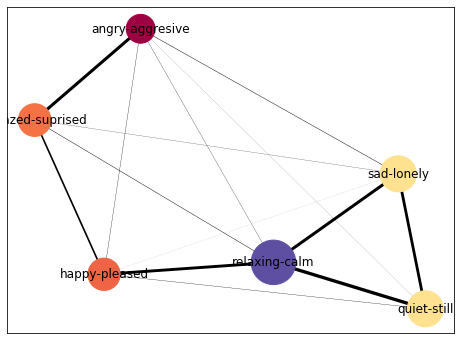

In [28]:
G = make_label_graph(y_train,True)

看起来这个图应该差不多的，某些类型的音乐可能在节奏上有一定的相似性吧           
伤心孤独 - 安静静止     
愤怒攻击性 - 惊讶惊喜    
能够相互转换的标签之间，应当属于同一个社群   

Randomwalk simulation +  hierachical clutering

In [29]:
partition = best_partition(G)
result = []
for k,v in partition.items():
    result.append([k,v])
pd.DataFrame(result, columns = ['node','cluster'])

,node,cluster
0,1,0
1,2,1
2,0,0
3,5,0
4,3,1
5,4,1


然后就可以划分出社群了

### 然后看看MultiLearn在搞什么幺蛾子吧

In [30]:
from skmultilearn.cluster import LabelCooccurrenceGraphBuilder

In [34]:
graph_builder = LabelCooccurrenceGraphBuilder(weighted=True, include_self_edges=False)
edge_map = graph_builder.transform(y_train)

In [35]:
edge_map

{(1, 2): 58.0,
 (0, 5): 61.0,
 (1, 5): 6.0,
 (0, 1): 33.0,
 (2, 3): 66.0,
 (2, 4): 60.0,
 (3, 4): 56.0,
 (4, 5): 9.0,
 (2, 5): 5.0,
 (0, 4): 4.0,
 (1, 4): 1.0,
 (0, 2): 9.0,
 (1, 3): 6.0,
 (3, 5): 2.0}

In [40]:
{(u,v):d for u,v,d in G.edges(data = True)}

{(1, 2): {'weight': 58},
 (1, 5): {'weight': 6},
 (1, 0): {'weight': 33},
 (1, 4): {'weight': 1},
 (1, 3): {'weight': 6},
 (2, 3): {'weight': 66},
 (2, 4): {'weight': 60},
 (2, 5): {'weight': 5},
 (2, 0): {'weight': 9},
 (0, 5): {'weight': 61},
 (0, 4): {'weight': 4},
 (5, 4): {'weight': 9},
 (5, 3): {'weight': 2},
 (3, 4): {'weight': 56}}

Build 出来的图和我们自己干出来的图是一样的

### Graph clustering with Multi learn

直接copy paste 代码，然后用它做标签聚类                
注意传入的参数是鲁汶社群划分算法，和我们刚才自己的best_partition一样的，一模一样           

In [50]:
from skmultilearn.cluster import NetworkXLabelGraphClusterer

# 这个函数只有一个作用，就是把聚类出来的结果做成一个python的字典
def to_membership_vector(partition):
    return {
        member :  partition_id
        for partition_id, members in enumerate(partition)
        for member in members
    }

clusterer = NetworkXLabelGraphClusterer(graph_builder, method='louvain')
partition = clusterer.fit_predict(X_train,y_train)
partition

array([[0, 1, 5],
       [2, 3, 4]])

其实这个partition不重要，重要的是这个clusterer对象里面，有一个networkx的图

In [58]:
clusterer.graph_

In [51]:
membership_vector = to_membership_vector(partition)

In [52]:
membership_vector

{0: 0, 1: 0, 5: 0, 2: 1, 3: 1, 4: 1}

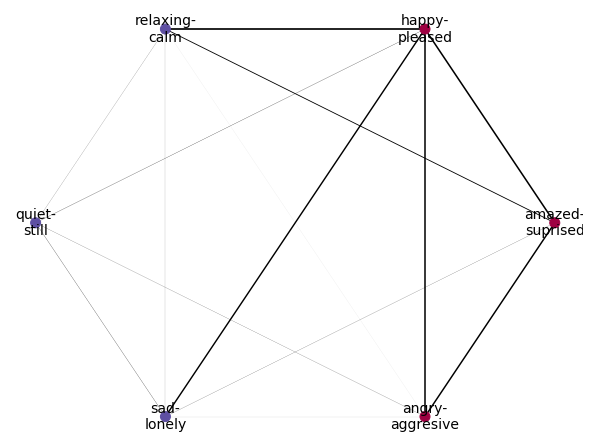

In [54]:
import networkx as nx
names_dict = dict(enumerate(x[0].replace('-','-\n') for x in label_names))
nx.draw(
    clusterer.graph_,
    pos=nx.circular_layout(clusterer.graph_),
    labels=names_dict,
    with_labels = True,
    width = [10*x/y_train.shape[0] for x in clusterer.weights_['weight']],
    node_color = [membership_vector[i] for i in range(y_train.shape[1])],
    cmap=plt.cm.Spectral,
    node_size=100,
    font_size=14
)

到这儿我们其实手上就有一张标签图，存储在clusterer对象里面，下面我们其实要使用的就只有这个cluterer对象      

<font color = 'darkred'><b>这儿， 一个朴素贝叶斯的分类器，被包裹了两次，这两个包裹的对象，都需要看一下

In [62]:
from skmultilearn.ensemble import LabelSpacePartitioningClassifier
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

classifier = LabelSpacePartitioningClassifier(
    classifier = LabelPowerset(classifier=GaussianNB()),
    clusterer = clusterer
)

classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

accuracy_score(y_test, prediction)

0.1782178217821782

**第一层包裹： Label Powerset**

将一个多标签的问题，转化为一个多分类的问题       
多个标签就涉及到标签组合， 每一个特定的标签组合，作为一个分类，预测True 或 False      
最后就是预测每个组合的是或否的多分类问题了                            

```
Transform multi-label problem to a multi-class problem

Label Powerset is a problem transformation approach to multi-label classification that transforms a multi-label problem to a multi-class problem with 1 multi-class classifier trained on all unique label combinations found in the training data.

The method maps each combination to a unique combination id number, and performs multi-class classification using the classifier as multi-class classifier and combination ids as classes.
```

```python
[docs]    def transform(self, y):
        """Transform multi-label output space to multi-class

        Transforms a mutli-label problem into a single-label multi-class
        problem where each label combination is a separate class.

        Parameters
        -----------
        y : `array_like`, :class:`numpy.matrix` or :mod:`scipy.sparse` matrix of `{0, 1}`, shape=(n_samples, n_labels)
            binary indicator matrix with label assignments

        Returns
        -------
        numpy.ndarray of `{0, ... , n_classes-1}`, shape=(n_samples,)
            a multi-class output space vector

        """

        y = self._ensure_output_format(
            y, sparse_format='lil', enforce_sparse=True)

        self._clean()
        self._label_count = y.shape[1]

        last_id = 0
        train_vector = []
        
        # 这个地方循环y.rows的时候，就是在循环标签的组合，如果已经记录过，就不增加，否则增加一个标签组合
        # 同时记录了某中标签组合第一次出现的id
        for labels_applied in y.rows:
            label_string = ",".join(map(str, labels_applied))

            if label_string not in self.unique_combinations_:
                self.unique_combinations_[label_string] = last_id
                self.reverse_combinations_.append(labels_applied)
                last_id += 1

            train_vector.append(self.unique_combinations_[label_string])

        return np.array(train_vector)
        # 到这儿就记录了一个multiclass的矩阵了
```

再然后你的fit就很简单了
```python

[docs]    def fit(self, X, y):
        """Fits classifier to training data

        Parameters
        ----------
        X : `array_like`, :class:`numpy.matrix` or :mod:`scipy.sparse` matrix, shape=(n_samples, n_features)
            input feature matrix
        y : `array_like`, :class:`numpy.matrix` or :mod:`scipy.sparse` matrix of `{0, 1}`, shape=(n_samples, n_labels)
            binary indicator matrix with label assignments

        Returns
        -------
        self
            fitted instance of self

        Notes
        -----
        .. note :: Input matrices are converted to sparse format internally if a numpy representation is passed
        """
        X = self._ensure_input_format(
            X, sparse_format='csr', enforce_sparse=True)

        self.classifier.fit(self._ensure_input_format(X),
                            self.transform(y))

        return self
```

**第二层包裹：标签空间分割预测器  LabelSpacePartitioningClassifier**    



首先你发现这个东西是继承了BinaryRelevance了
```python
[docs]class LabelSpacePartitioningClassifier(BinaryRelevance):
    """Partition label space and classify each subspace separately


    This classifier performs classification by:

```

然后发现再BinaryRelevance中有下面这个函数，这个相当于对一个多分类的任务，转化成很多二分类的任务 -OneVsRest
这个就是按照y的列数，分割出很多的任务

```python
    def _generate_partition(self, X, y):
        """Partitions the label space into singletons

        Sets `self.partition_` (list of single item lists) and `self.model_count_` (equal to number of labels).

        Parameters
        ----------
        X : `array_like`, :class:`numpy.matrix` or :mod:`scipy.sparse` matrix, shape=(n_samples, n_features)
            not used, only for API compatibility
        y : `array_like`, :class:`numpy.matrix` or :mod:`scipy.sparse` matrix of `int`, shape=(n_samples, n_labels)
            binary indicator matrix with label assignments
        """
        self.partition_ = list(range(y.shape[1]))
        self.model_count_ = y.shape[1]
```

然后再LabelSpacePartitioningClassifier， 有一个图预测器clusterer  


```python
   def __init__(self, classifier=None, clusterer=None, require_dense=None):
        super(LabelSpacePartitioningClassifier, self).__init__(classifier, require_dense)
        self.clusterer = clusterer
        self.copyable_attrs = ['clusterer', 'classifier', 'require_dense']
        
这儿重写了父类的_generate_partition方法               
意义是不按照y的列数分割子任务，按照相似标签组合聚类的个数，分割子任务                
```python


    def _generate_partition(self, X, y):
        """Cluster the label space

        Saves the partiton generated by the clusterer to :code:`self.partition_` and
        sets :code:`self.model_count_` to number of clusers and :code:`self._label_count`
        to number of labels.

        Parameters
        -----------
        X : numpy.ndarray or scipy.sparse
            input features of shape :code:`(n_samples, n_features)`, passed to clusterer
        y : numpy.ndarray or scipy.sparse
            binary indicator matrix with label assigments of shape
            :code:`(n_samples, n_labels)`

        Returns
        -------
        LabelSpacePartitioningClassifier
            returns an instance of itself
        """

        self.partition_ = self.clusterer.fit_predict(X, y)
        self.model_count_ = len(self.partition_)
        self._label_count = y.shape[1]

        return self
    
```

### Multilearn的思想总结

首先拿到一个多标签的任务                               
找出相似的标签组合，聚类（图算法）  分成子任务         
每个子任务，将多标签问题，转化成多分类问题               
使用Base预测器进行预测